In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
url = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv"
df = pd.read_csv(url)

df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [3]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='final_price', ylabel='Count'>

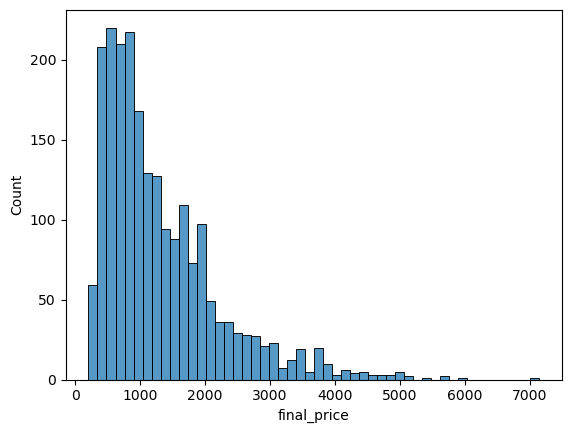

In [4]:
sns.histplot(df['final_price'], bins=50)

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='final_price', ylabel='Count'>

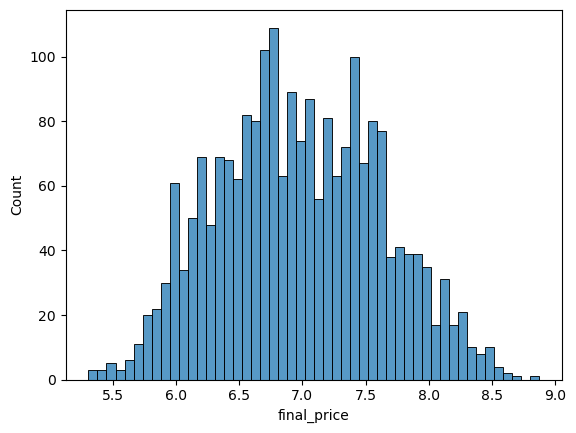

In [5]:
#The plot has long tail, we will apply logarithm to the price. 
#This results in more compact values
price_logs = np.log1p(df.final_price)
sns.histplot(price_logs, bins=50)

## **Question 1**
There's one column with missing values. What is it?

'ram'

'storage'

'screen'

'final_price'

In [7]:
#Missing values
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]
missing_columns

storage_type      42
gpu             1371
screen             4
dtype: int64

Response: "Screen"

## **Question 2**
What's the median (50% percentile) for variable 'ram'?

8

16

24

32


In [10]:
median_ram = df['ram'].median()
print("The median RAM is:", median_ram)

The median RAM is: 16.0


## **Prepare and split the dataset**
Shuffle the dataset (the filtered one you created above), use seed 42.

Split your data in train/val/test sets, with 60%/20%/20% distribution.
Use the same code as in the lectures

In [12]:
n = len(df)
int(len(df) * 0.2) #20%
n_val = int(len(df) * 0.2)
n_test = int(len(df) * 0.2) 
n_train = n - n_test - n_val 
n, n_val + n_test + n_train

(2160, 2160)

In [13]:
df
# I can see there is an order, so I'm goint oto shuffle

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99


In [71]:
idx = np.arange(n)
idx

array([   0,    1,    2, ..., 2157, 2158, 2159])

In [73]:
np.random.shuffle(idx)
idx

array([ 907,  950,   85, ...,  300, 1386,  552])

In [75]:
# Now, creates datasets with each value
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

In [77]:
y_train = np.log1p(df_train.final_price.values)
y_val = np.log1p(df_val.final_price.values)
y_test = np.log1p(df_test.final_price.values)

y_train = df_train.final_price.values
y_val = df_val.final_price.values

In [79]:
del df_train['final_price']
del df_test['final_price']
del df_val['final_price']

## **Question 3**
We need to deal with missing values for the column from Q1.

We have two options: fill it with 0 or with the mean of this variable.
Try both options. For each, train a linear regression model without regularization using the code from the lessons.
For computing the mean, use the training only!
Use the validation dataset to evaluate the models and compare the RMSE of each option.

Round the RMSE scores to 2 decimal digits using round(score, 2)
Which option gives better RMSE?
Options:

With 0

With mean

Both are equally good

In [82]:
base = ['ram', 'storage', 'screen']
 
df_train[base].head()

,ram,storage,screen
907,8,256,13.3
950,16,256,15.6
85,8,512,15.6
699,32,1000,15.6
653,16,512,15.6


In [84]:
#Mean for the variable screen in df_train:
screen_mean = df_train.screen.mean()
screen_mean

15.158855375096676

In [87]:
def prepare_X(df,val_na):
    df_num = df[base]
    df_num = df_num.fillna(val_na)
    
    X = df_num.values
    return X

In [89]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
     
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
     
    return w_full[0], w_full[1:]

In [91]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse).round(2)

In [93]:
# First: fill na with 0
# Training:
X_train = prepare_X(df_train,0)
w0, w = train_linear_regression(X_train, y_train)
 
# Validation:
X_val = prepare_X(df_val,0)
y_pred = w0 + X_val.dot(w)
 
# Evaluation:
rmse_0 = rmse(y_val, y_pred)
print(f"The rmse is: {rmse_0}")

The rmse is: 669.67


In [95]:
# Second: fill na with the mean of the train
# Training:
X_train = prepare_X(df_train[base],screen_mean)
w0, w = train_linear_regression(X_train, y_train)
 
# Validation:
X_val = prepare_X(df_val[base],screen_mean)
y_pred = w0 + X_val.dot(w)
 
# Evaluation:
rmse_meanScreen = rmse(y_val, y_pred)
print(f"The rmse is: {rmse_meanScreen}")

The rmse is: 669.77


We consider that are similar

## **Question 4**
Now let's train a regularized linear regression.

For this question, fill the NAs with 0.

Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].

Use RMSE to evaluate the model on the validation dataset.

Round the RMSE scores to 2 decimal digits.

Which r gives the best RMSE?

If there are multiple options, select the smallest r.

Options:

0

0.01

1

10

100


In [99]:
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]

In [101]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
     
    XTX = X.T.dot(X)
    XTX = XTX + r*np.eye(XTX.shape[0])
     
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
     
    return w_full[0], w_full[1:]

In [108]:
for r in r_values:
    X_train = prepare_X(df_train,0)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
 
    X_val = prepare_X(df_val,0)
    y_pred = w0 + X_val.dot(w)
 
    score = rmse(y_val, y_pred).round(2)
     
    print("reg parameter: ",r, "bias term: ",w0, "rmse: ",score)

reg parameter:  0 bias term:  790.7079598963985 rmse:  669.67
reg parameter:  0.01 bias term:  789.9540139303442 rmse:  669.66
reg parameter:  0.1 bias term:  783.2326700584396 rmse:  669.65
reg parameter:  1 bias term:  721.8183883950544 rmse:  669.52
reg parameter:  5 bias term:  535.2974703349712 rmse:  669.34
reg parameter:  10 bias term:  404.6338326422558 rmse:  669.4
reg parameter:  100 bias term:  75.19407146420713 rmse:  670.13


The result is 0

## **Question 5**
We used seed 42 for splitting the data. 

Let's find out how selecting the seed influences our score.

Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].

For each seed, do the train/validation/test split with 60%/20%/20% distribution.

Fill the missing values with 0 and train a model without regularization.

For each seed, evaluate the model on the validation dataset and collect the RMSE scores.

What's the standard deviation of all the scores? To compute the standard deviation, use np.std.

Round the result to 3 decimal digits (round(std, 3))
What's the value of std?


19.176

29.176

39.176

49.176

In [54]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
 

In [56]:
def train_linear_regression_wor(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
     
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
     
    return w_full[0], w_full[1:]

In [60]:
rmse_scores = []
for s in seeds:
    idx = np.arange(n)
    np.random.seed(s)
    np.random.shuffle(idx)

    # Now, creates datasets with each value
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train + n_val]]
    df_test = df.iloc[idx[n_train + n_val:]]

    #y_train = np.log1p(df_train.final_price.values)
    #y_val = np.log1p(df_val.final_price.values)
    #y_test = np.log1p(df_test.final_price.values)

    y_train = df_train.final_price.values
    y_val = df_val.final_price.values
    
    
    del df_train['final_price']
    del df_test['final_price']
    del df_val['final_price']

    # First: fill na with 0
    # Training:
    X_train = prepare_X(df_train,0)
    w0, w = train_linear_regression_wor(X_train, y_train)
     
    # Validation:
    X_val = prepare_X(df_val,0)
    y_pred = w0 + X_val.dot(w)
     
    # Evaluation:

    rmse_0  = rmse(y_val, y_pred)
    rmse_scores.append(rmse_0)
    print("seed: ",s, "bias term: ",w0, "rmse: ",rmse_0 )

seed:  0 bias term:  547.5696230190986 rmse:  565.45
seed:  1 bias term:  594.4197428005946 rmse:  636.8
seed:  2 bias term:  649.4685454774392 rmse:  588.96
seed:  3 bias term:  571.945904011762 rmse:  597.81
seed:  4 bias term:  629.3882030650731 rmse:  571.96
seed:  5 bias term:  580.7647373336141 rmse:  573.24
seed:  6 bias term:  783.7683689916059 rmse:  647.34
seed:  7 bias term:  376.43586006285267 rmse:  550.44
seed:  8 bias term:  572.8852361204764 rmse:  587.33
seed:  9 bias term:  663.3792792615569 rmse:  576.1


In [62]:
# Calculate the standard deviation of RMSE scores
std_rmse = round(np.std(rmse_scores), 3)
print("Standard deviation of RMSE scores: ", std_rmse)

Standard deviation of RMSE scores:  29.176


## **Question 6**
Split the dataset like previously, use seed 9.

Combine train and validation datasets.

Fill the missing values with 0 and train a model with r=0.001.

What's the RMSE on the test dataset?

Options:

598.60
608.60
618.60
628.60

In [120]:
import numpy as np
import pandas as pd

# Assuming df is your DataFrame and prepare_X, train_linear_regression, and rmse functions are defined

# Set the seed
seed = 9
n = len(df)  # Total number of samples
n_train = int(0.6 * n)  # 60% for training
n_val = int(0.2 * n)    # 20% for validation
n_test = n - n_train - n_val  # Remaining 20% for testing

# Shuffle the dataset
idx = np.arange(n)
np.random.seed(seed)
np.random.shuffle(idx)

# Create datasets
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

# Combine train and validation datasets
df_combined = pd.concat([df_train, df_val])

# Fill missing values with 0
df_combined.fillna(0, inplace=True)
df_test.fillna(0, inplace=True)

# Prepare target variable
y_train = df_combined.final_price.values
del df_combined['final_price']  # Remove target variable from features

# Prepare features
X_combined = prepare_X(df_combined, 0)

# Train the model with regularization parameter r = 0.001
r = 0.001
w0, w = train_linear_regression_reg(X_combined, y_train, r=r)  # Assuming train_linear_regression can take r as an argument

# Prepare the test dataset
y_test = df_test.final_price.values
del df_test['final_price']  # Remove target variable from features
X_test = prepare_X(df_test, 0)

# Make predictions on the test dataset
y_pred_test = w0 + X_test.dot(w)

# Calculate RMSE on the test dataset
rmse_test = round(rmse(y_test, y_pred_test), 2)  # Assuming rmse function is defined
print("RMSE on the test dataset: ", rmse_test)

RMSE on the test dataset:  608.61


/tmp/ipykernel_1702/2369847561.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.fillna(0, inplace=True)
